In [11]:
import pandas as pd
import numpy as np
import json
from sklearn.preprocessing import MinMaxScaler  
from sklearn.model_selection import train_test_split
from utils_plot import plot_comparisons, plot_feature_importances
import warnings; warnings.filterwarnings('ignore')

# Set seed for reproducibility
seed = 100
np.random.seed(seed)

%matplotlib inline

# Load Data

Literature data is used as training/validation set. Our experimental data is used as a test set

In [2]:
with open('./literature_data.json', 'r') as file:
    data = pd.read_json(json.load(file), orient='table')
    
data

,No,Units of A,Units of B,Units of C,Units of D,Units of E,Mp,Cloud Point
4,5,100.000000,0.000000,0,0.000000,0,6700.0,90.6
5,6,150.000000,0.000000,0,0.000000,0,9000.0,85.3
6,7,200.000000,0.000000,0,0.000000,0,13300.0,78.3
7,8,300.000000,0.000000,0,0.000000,0,21000.0,73.5
8,9,500.000000,0.000000,0,0.000000,0,37300.0,69.3
9,10,0.000000,15.000000,0,0.000000,0,3100.0,42.9
10,11,0.000000,20.000000,0,0.000000,0,3700.0,39.0
11,12,0.000000,25.000000,0,0.000000,0,4300.0,37.5
12,13,0.000000,50.000000,0,0.000000,0,6200.0,30.3
13,14,0.000000,100.000000,0,0.000000,0,8140.0,29.6


In [3]:
with open('./experimental_data.json', 'r') as file:
    exp_data = pd.read_json(json.load(file), orient='table')
exp_data

,No,Units of A,Units of B,Units of C,Units of D,Units of E,Mp,Cloud Point
8,9,158.024816,0.000000,0.000000,0.000000,0,15665,87.50
9,10,90.991627,0.000000,0.000000,0.000000,0,9020,88.50
10,11,170.654696,0.000000,0.000000,0.000000,0,16917,86.30
13,14,434.601029,0.000000,0.000000,0.000000,0,43082,60.75
14,15,388.439423,0.000000,0.000000,0.000000,0,38506,61.50
15,16,208.352668,0.000000,0.000000,0.000000,0,20654,65.50
16,17,129.787136,14.741969,0.000000,0.000000,0,14534,74.50
17,18,104.863750,16.506331,0.000000,0.000000,0,12263,71.25
18,19,71.687638,7.481482,0.000000,0.000000,0,7953,75.00
19,20,55.119485,15.456040,0.000000,0.000000,0,7213,66.00


## Train-valid-test split

Here, we split the literature data to train-valid sets in 90%-10% proportions. Our experimental data is used as a test set. This way, if the test error is sufficiently low then this justifies combining our datasets.

In [4]:
inputs = np.asarray(data.loc[:,'Units of A':'Mp'])
labels = np.asarray(data['Cloud Point'])
inputs_test = np.asarray(exp_data.loc[:,'Units of A':'Mp'])
labels_test = np.asarray(exp_data['Cloud Point'])

scaler = MinMaxScaler()
inputs = scaler.fit_transform(inputs)
inputs_test = scaler.transform(inputs_test)

inputs_train, inputs_valid, labels_train, labels_valid = train_test_split(
    inputs, labels, test_size=0.1, random_state=seed)

# Comparing Different Regressors

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor

In [25]:
# Linear Regressor
linear_regressor = LinearRegression()
linear_regressor.fit(inputs_train, labels_train)
linreg_pred_train = linear_regressor.predict(inputs_train)
linreg_pred_valid = linear_regressor.predict(inputs_valid)
linreg_pred_test = linear_regressor.predict(inputs_test)

# Polynomial Regressor
poly = PolynomialFeatures(degree=2)
poly_inputs_train = poly.fit_transform(inputs_train)
poly_inputs_valid = poly.transform(inputs_valid)
poly_inputs_test = poly.transform(inputs_test)
poly_regressor = LinearRegression()
poly_regressor.fit(poly_inputs_train, labels_train)
poly_pred_train = poly_regressor.predict(poly_inputs_train)
poly_pred_valid = poly_regressor.predict(poly_inputs_valid)
poly_pred_test = poly_regressor.predict(poly_inputs_test)


# Gradient Boosting Regressor
gb_regressor = XGBRegressor()
gb_regressor.fit(inputs_train, labels_train)
gbr_pred_train = gb_regressor.predict(inputs_train)
gbr_pred_valid = gb_regressor.predict(inputs_valid)
gbr_pred_test = gb_regressor.predict(inputs_test)

# Support Vector Regressor
sv_regressor = SVR(C=1e5)
sv_regressor.fit(inputs_train, labels_train)
sv_pred_train = sv_regressor.predict(inputs_train)
sv_pred_valid = sv_regressor.predict(inputs_valid)
sv_pred_test = sv_regressor.predict(inputs_test)

In [26]:
targets = {'train': labels_train, 'valid': labels_valid, 'test': labels_test}
linreg_res = {'train': linreg_pred_train, 'valid': linreg_pred_valid,
              'test': linreg_pred_test, 'name': 'Linear Regression'}
poly_res = {'train': poly_pred_train, 'valid': poly_pred_valid,
            'test': poly_pred_test, 'name': 'Polynomial Regression'}
gbr_res = {'train': gbr_pred_train, 'valid': gbr_pred_valid,
           'test': gbr_pred_test, 'name': 'Gradient Boosting Regression'}

sv_res = {'train': sv_pred_train, 'valid': sv_pred_valid,
           'test': sv_pred_test, 'name': 'Support Vector Regression'}

results = [linreg_res, poly_res, sv_res, gbr_res]

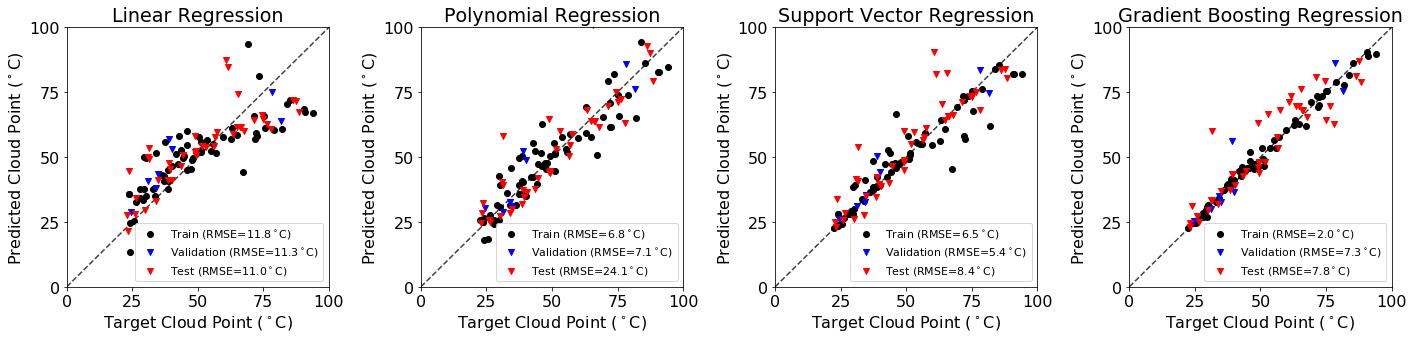

In [27]:
plot_comparisons(targets, results)

# Accuracy

In [62]:
import pandas as pd
from utils_plot import rmse
np.random.seed(seed)

In [63]:
n_fits = 100
test_rmses = []

for n in range(n_fits):
    # valid/train split
    inputs_train, inputs_valid, labels_train, labels_valid = train_test_split(
        inputs, labels, test_size=0.1)
    
    err = []
    for r in [linear_regressor, poly_regressor, sv_regressor, gb_regressor]:
        if r == poly_regressor:
            poly_inputs_train = poly.fit_transform(inputs_train)
            poly_inputs_test = poly.transform(inputs_test)
            poly_regressor.fit(poly_inputs_train, labels_train)
            err.append(rmse(poly_regressor.predict(poly_inputs_test), labels_test))
        else:
            r.fit(inputs_train, labels_train)
            err.append(rmse(r.predict(inputs_test), labels_test))
    
    test_rmses.append(err)

test_rmses = np.asarray(test_rmses)
test_rmses_mean = np.mean(test_rmses, axis=0)
test_rmses_std = np.std(test_rmses, axis=0)

In [68]:
pd.DataFrame(
    columns=['linear_regressor', 'poly_regressor', 'sv_regressor', 'gb_regressor'],
    data=np.row_stack([test_rmses_mean, test_rmses_std]),
    index=['Mean', 'Std']
)

,linear_regressor,poly_regressor,sv_regressor,gb_regressor
Mean,11.621111,25.823523,9.308906,7.244681
Std,1.162092,6.618554,3.368018,0.457801


# Time

## 1. Linear Regression

In [50]:
%timeit -n 100 linear_regressor.fit(inputs_train, labels_train)

265 µs ± 25.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## 2. Polynomial Regression

In [51]:
%timeit -n 100 poly_regressor.fit(poly_inputs_train, labels_train)

349 µs ± 33.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## 3. Support Vector Regression

In [52]:
%timeit -n 100 sv_regressor.fit(inputs_train, labels_train)

15.7 ms ± 209 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## 4. Gradient Boosting Regression

In [53]:
%timeit -n 100 gb_regressor.fit(inputs_train, labels_train)

4.03 ms ± 162 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Average Features Importances

In [9]:
n_fits = 100
importances = []
gb_regressor = XGBRegressor()

for n in range(n_fits):
    # valid/train split
    inputs_train, inputs_valid, labels_train, labels_valid = train_test_split(
        inputs, labels, test_size=0.1)
    
    gb_regressor.fit(inputs_train, labels_train)
    importances.append(gb_regressor.feature_importances_)
importances = np.asarray(importances)

imp_mean = np.mean(importances, axis=0)
imp_max = np.max(importances, axis=0)
imp_min = np.min(importances, axis=0)
imp_maxmin = np.asarray(list(zip(imp_min, imp_max))).T
im_std = np.std(importances, axis=0)

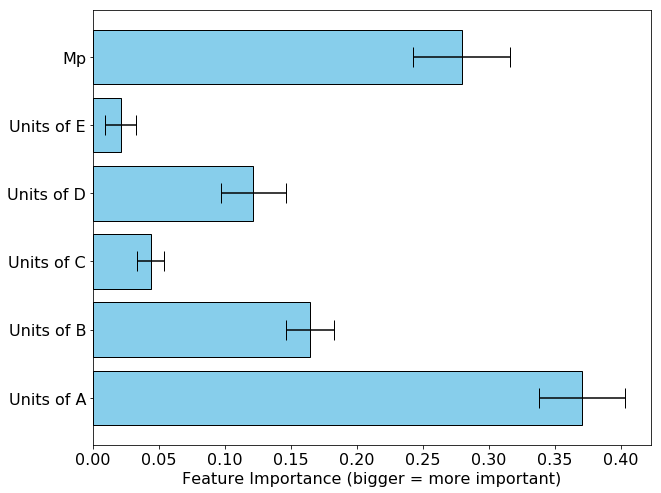

In [10]:
plot_feature_importances(imp_mean, data.columns[1:], xerrs=im_std)